## Observations and Insights 

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [109]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [110]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [111]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = study_data_complete
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [112]:
timepoint_number = duplicate_mice.groupby(["Mouse ID"])["Timepoint"].value_counts()


In [113]:
duplicate_mice_df = pd.DataFrame({"Number of Time Points": timepoint_number
                                                                 
                                   
                                 })
duplicate_mice_df.head()

Number of Time Points
Mouse ID Timepoint                       
a203     0                              1
         5                              1
         10                             1
         15                             1
         20                             1

In [114]:
duplicate_mice_df.loc[(duplicate_mice_df["Number of Time Points"]>1)]

Number of Time Points
Mouse ID Timepoint                       
g989     0                              2
         5                              2
         10                             2
         15                             2
         20                             2

In [115]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989", :]
print(dup_mouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#to drop a in a dataframe by index
#df.drop([0,1]) would drop the rows with index 0 and 1
study_data_complete.set_index("Mouse ID", inplace=True)
study_data_complete.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [117]:
study_data_complete1 = study_data_complete.drop(index='g989')


In [118]:
study_data_complete1 = study_data_complete1.reset_index(drop=False)
study_data_complete1.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [119]:
# Checking the number of mice in the clean DataFrame.
len(study_data_complete1["Mouse ID"].unique())


248

In [120]:
study_data_complete1["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [121]:

FTV_mean = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
FTV_median = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
FTV_variance = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
FTV_std = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
FTV_sem = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]
FTV_sem

Drug Regimen
Capomulin    1.223977
Ceftamin     0.902358
Infubinol    1.144427
Ketapril     1.453186
Naftisol     1.416363
Placebo      1.351726
Propriva     1.888586
Ramicane     1.226805
Stelasyn     1.576556
Zoniferol    1.003576
Name: Tumor Volume (mm3), dtype: float64

## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"mean": FTV_mean,
                          "median": FTV_median,
                          "variance": FTV_variance,
                          "standard deviation": FTV_std,
                          "SEM": FTV_sem})

summary_df





,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,36.236114,37.311846,31.460537,5.608969,1.223977
Ceftamin,64.132421,64.299830,10.585242,3.253497,0.902358
Infubinol,65.755562,66.083066,11.787426,3.433282,1.144427
Ketapril,70.662958,69.872251,23.229260,4.819674,1.453186
Naftisol,69.265506,69.563621,26.079104,5.106770,1.416363
Placebo,68.084082,69.042841,20.098783,4.483167,1.351726
Propriva,66.258529,64.957562,24.967290,4.996728,1.888586
Ramicane,34.955595,34.848627,30.101010,5.486439,1.226805
Stelasyn,68.438310,69.299149,27.340818,5.228845,1.576556


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

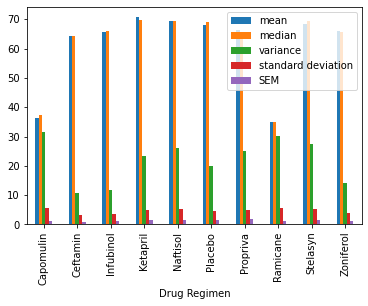

In [160]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas. Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the total number of measurements taken for each treatment regimen throughout the course of the study.
#NOTE: These plots should look identical.

df_statistic_bar = summary_df.plot.bar()

In [161]:
measurement_quantity = study_data_complete1['Drug Regimen'].value_counts()
measurement_quantity_df = pd.DataFrame(measurement_quantity)
measurement_quantity_df

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178
Propriva,148


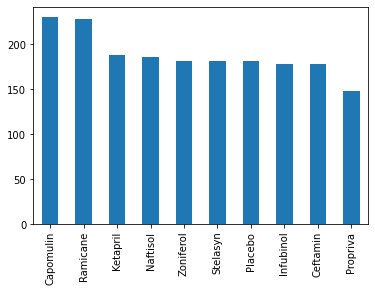

In [162]:
measurement_quantity = study_data_complete1['Drug Regimen'].value_counts()

df_bar = measurement_quantity.plot.bar()

([<matplotlib.axis.XTick at 0x2c0c6d2a6a0>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Zoniferol'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Propriva')])

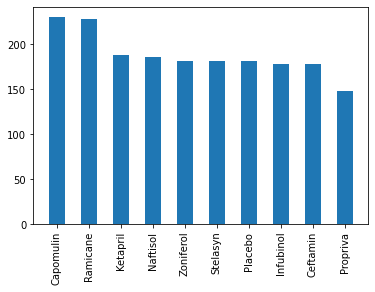

In [163]:
y_axis = measurement_quantity_df["Drug Regimen"]
x_axis = np.arange(len(measurement_quantity_df.index))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, width=0.5, alpha=1, align="center")

plt.xticks(tick_locations, measurement_quantity_df.index, rotation="vertical")


In [165]:
study_data_complete1["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



([<matplotlib.patches.Wedge at 0x2c0c57b63a0>,
 [Text(-1.0995024239828841, -0.03308201408261565, 'male'),
  Text(1.0995024239828841, 0.033082014082615026, 'female')],
 [Text(-0.5997285948997549, -0.018044734954153988, '51.0%'),
  Text(0.5997285948997549, 0.018044734954153648, '49.0%')])

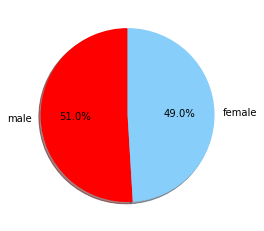

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = study_data_complete1["Sex"].value_counts()
colors = ["red", "lightskyblue"]
labels = ["male", "female"]
plt.pie(sexes, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
